In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(os.listdir('/kaggle/input/'))

[]


# Description of the Dataset

In [6]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [61]:
X, y = mnist['data'], mnist['target']
y = y.astype(int)
y.shape

(70000,)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

TypeError: Singleton array array(False) cannot be considered a valid collection.

# Visulasing some random photos from the dataset

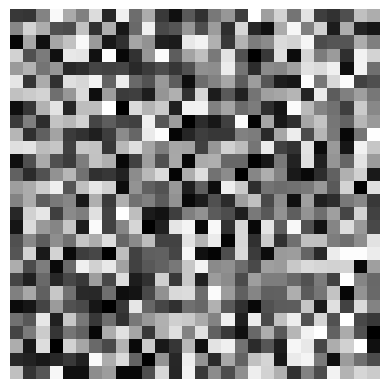

In [70]:
import numpy as np
X = np.random.rand(1000, 784)  # Ensure X is (num_samples, 28*28)
rand_digit_index = np.random.randint(low=0, high=X.shape[0] - 1)  
rand_image = X[5].reshape(28, 28)  # Ensure the shape matches (28, 28)

plt.imshow(rand_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()
# print(y[0])

In [71]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [72]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [73]:
y_pred = clf.predict(X_test)

cnt = 0
for pred in y_pred:
    cnt += pred.astype(int)

print(cnt)
print(y_pred.shape)
print(y_test_5.shape)

cnt_y_test = 0

for y in y_test_5:
    cnt_y_test += y

print(cnt_y_test)

print(f"accuracy % = {cnt/cnt_y_test}")

1186
(10000,)
(10000,)
892
accuracy % = 1.3295964125560538


# Learning Cross-Validation

In [86]:
n = np.array([1, 3, 5, 6,8 , 56,8 , 7,4 ,7,7])
t = [0, 5, 2]
n[t]
X_train = X_train.to_numpy()
y_train_5 = y_train_5.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10,shuffle=True)

for fold, (train_idx, test_idx) in enumerate(skfolds.split(X_train, y_train_5)):
    print(f"for fold {fold + 1} results :")
    print(f"train_index : {train_idx}, test_index : {test_idx}")
    clone_clf = clone(clf)
    X_train_folds = X_train[train_idx]
    y_train_folds = y_train_5[train_idx]
    X_test_fold = X_train[test_idx]
    y_test_fold = y_train_5[test_idx]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)

    print(f"correctness score = {n_correct/ len(y_pred)}")


for fold 1 results :
train_index : [    0     1     2 ... 59997 59998 59999], test_index : [   21    45    49 ... 59965 59980 59982]
correctness score = 0.961
for fold 2 results :
train_index : [    0     1     2 ... 59997 59998 59999], test_index : [    8    15    25 ... 59925 59968 59988]
correctness score = 0.9663333333333334
for fold 3 results :
train_index : [    0     1     2 ... 59997 59998 59999], test_index : [   48    56    72 ... 59953 59975 59991]
correctness score = 0.9643333333333334
for fold 4 results :
train_index : [    0     2     3 ... 59997 59998 59999], test_index : [    1    13    16 ... 59990 59994 59995]
correctness score = 0.97
for fold 5 results :
train_index : [    1     2     4 ... 59996 59997 59998], test_index : [    0     3     5 ... 59981 59987 59999]
correctness score = 0.9616666666666667
for fold 6 results :
train_index : [    0     1     2 ... 59997 59998 59999], test_index : [    4    22    27 ... 59961 59970 59971]
correctness score = 0.968166666666

In [88]:
# using sklearn's cross validation scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train_5, cv=4, scoring='accuracy')

In [90]:
scores

array([0.95766667, 0.9664    , 0.96513333, 0.95366667])

# *Learning Confusion Matrix*

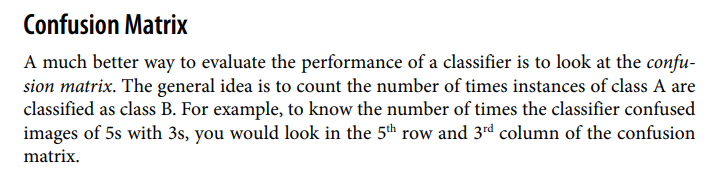

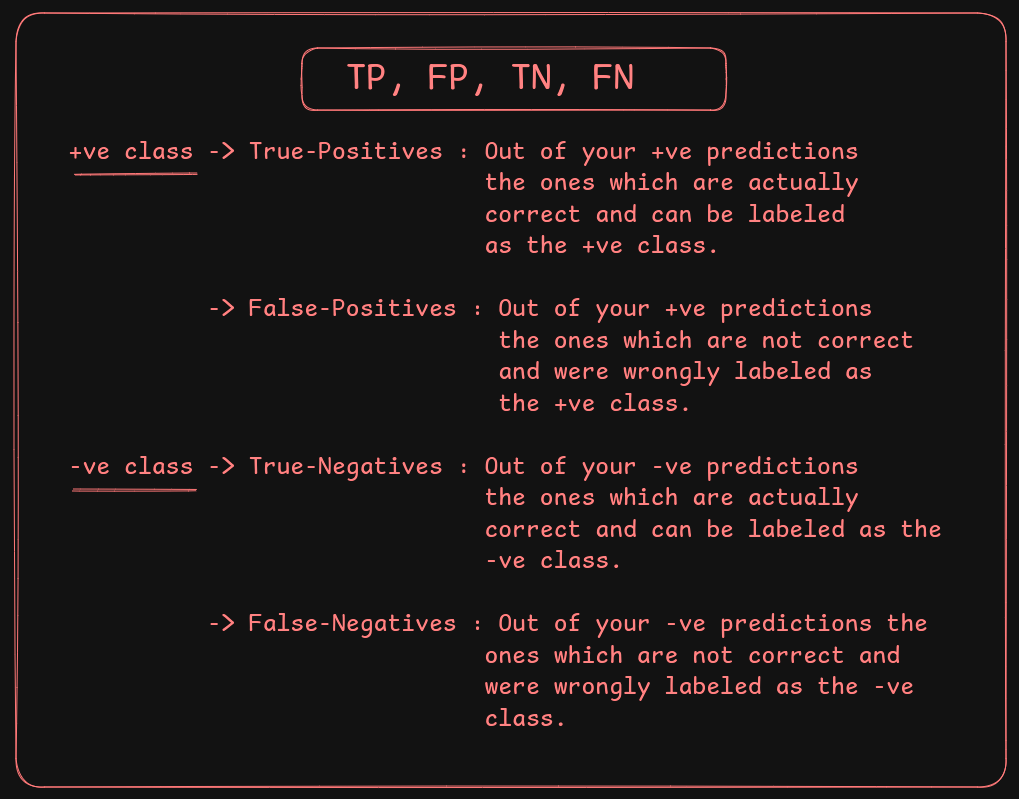

In [91]:
from sklearn.model_selection import cross_val_predict
# returning k-fold predictions on the training set

y_train_pred = cross_val_predict(clf, X_train, y_train_5, cv=4)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [93]:
cm

array([[53263,  1316],
       [ 1041,  4380]])

## Precision
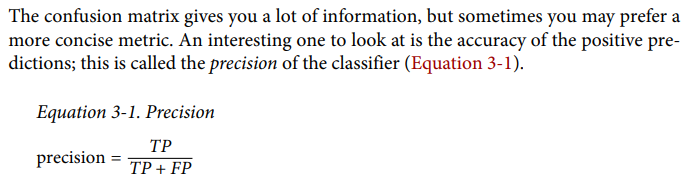

## Recall
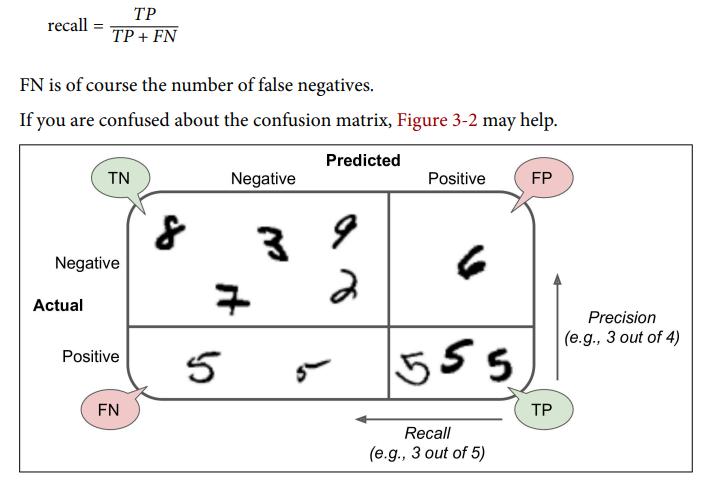

In [98]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(f"precision : {precision}, recall : {recall}")

precision : 0.7689606741573034, recall : 0.8079690094078583


## F1 Score
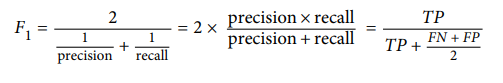

In [100]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)
print(f"f1 score : {f1}")

f1 score : 0.7879823693442477


In [104]:
y_scores = cross_val_predict(clf, X_train, y_train_5, cv=4,method="decision_function")

In [105]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

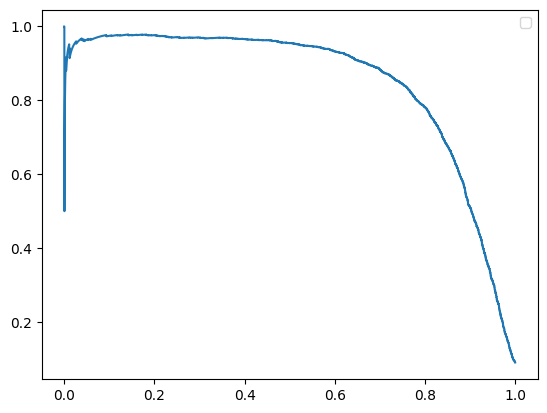

In [109]:
plt.plot(recalls, precisions)
plt.legend()

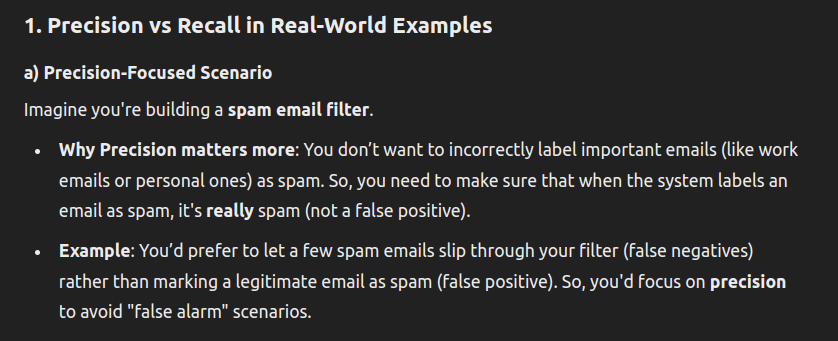

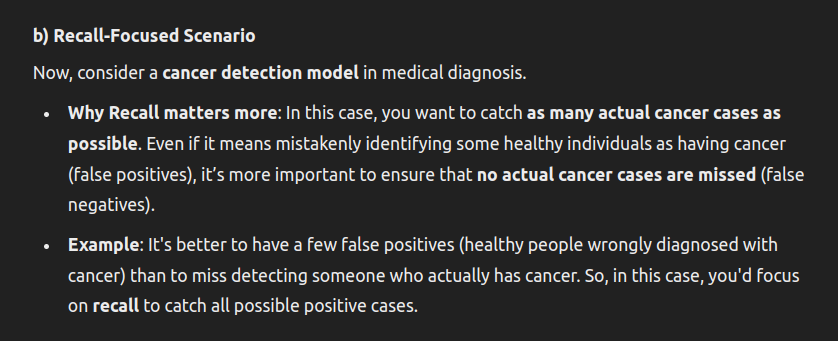

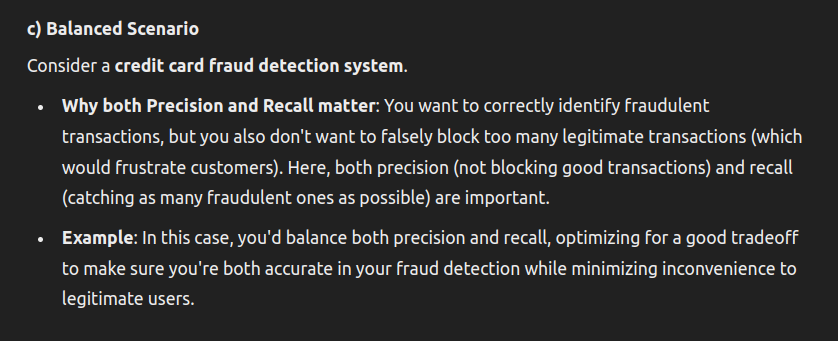

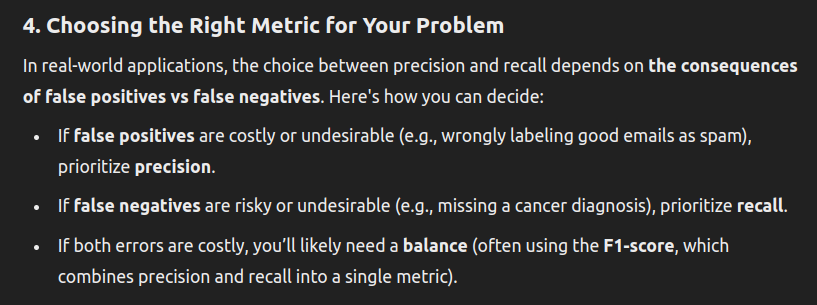